### Name Entity From Capital Letter Words

In [3]:
#!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

#### Capital Letter Word And Lower Letter Word

In [2]:
folder_name = "German"

In [3]:
df = pd.read_csv(f"/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Capital/Not_Apply_Lower_Word_Merge_Result.csv") # Not apply lower technique
df

,word,frequency
0,Ich,4365103
1,ist,3911007
2,ich,3770114
3,Sie,3694688
4,nicht,3627054
...,...,...
1126982,Victra,1
1126983,Pharmakognosie,1
1126984,VerhandIungsteams,1
1126985,doverije,1


In [4]:
df = df[df.iloc[:,1]>=5]
df

,word,frequency
0,Ich,4365103
1,ist,3911007
2,ich,3770114
3,Sie,3694688
4,nicht,3627054
...,...,...
331414,Spielsendung,5
331415,Nadeleinstiche,5
331416,Intubiert,5
331417,stinkigsten,5


In [5]:
def word_length(var):
    var = str(var)
    if len(var) <= 15:
        return var
    else:
        return "word is bigger than adjust value"

In [6]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [7]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,Ich
1,ist
2,ich
3,Sie
4,nicht
...,...
312304,Spielsendung
312305,Nadeleinstiche
312306,Intubiert
312307,stinkigsten


In [8]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [9]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,Ich
1,Sie
2,Das
3,Was
4,Du
...,...
222871,Tyleman
222872,Spielsendung
222873,Nadeleinstiche
222874,Intubiert


In [10]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,ich
1,sie
2,das
3,was
4,du
...,...
222871,tyleman
222872,spielsendung
222873,nadeleinstiche
222874,intubiert


In [11]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,ist
1,ich
2,nicht
3,du
4,die
...,...
89428,superleckeren
89429,kleckerweise
89430,nobleren
89431,frühkindlicher


In [12]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,ist
1,ich
2,nicht
3,du
4,die
...,...
89428,superleckeren
89429,kleckerweise
89430,nobleren
89431,frühkindlicher


In [13]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [14]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [15]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set)) # compare capital letter word and lower letter word
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,catron
1,undercoveragent
2,satay
3,skeeball
4,kokosnussmilch
...,...
175024,knalltüten
175025,venedigs
175026,bligh
175027,cilla


In [16]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [17]:
df_all_capital.to_excel("All_Time_Capital_Letter_Words.xlsx", sheet_name="Word", index=False)

#### Sentence First Word Analysis

In [18]:
df_sent = pd.read_csv(f"/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Sentence/Merge/Sentence_Merge.csv") # Sentence Merge Result
df_sent

,sentence,frequency,ratio
0,ja,486696,1.180187
1,nein,345601,0.838046
2,was,170799,0.414170
3,danke,148807,0.360841
4,hallo,95313,0.231124
...,...,...,...
4076034,wurst wurst wurst,2,0.000005
4076035,wir können relaxen uns vielleicht einen film a...,2,0.000005
4076036,sie können fliegen haben den röntgenblick,2,0.000005
4076037,was tust du cookie,2,0.000005


In [19]:
#df_sent = df_sent[df_sent.iloc[:,1]>=5]

In [23]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", str(i), re.UNICODE)
    first_words.append(words[0])

In [24]:
first_ser = pd.Series(first_words)
first_ser

0              ja
1            nein
2             was
3           danke
4           hallo
            ...  
4076034     wurst
4076035       wir
4076036       sie
4076037       was
4076038    joanna
Length: 4076039, dtype: object

In [25]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,ich,466680
1,das,167581
2,sie,157697
3,du,137723
4,wir,118627
...,...,...
130592,hülya,1
130593,sontarans,1
130594,taoist,1
130595,streatfeild,1


In [26]:
set_first = set(df_first.iloc[:,0])

In [27]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [28]:
df_all_spec = pd.DataFrame(set_all_capital.difference(set_first)) # Capital letter word and first sentence word
df_all_spec.rename(columns={0:"word"}, inplace=True)
df_all_spec

,word
0,catron
1,undercoveragent
2,satay
3,skeeball
4,stickell
...,...
107868,hatfields
107869,wetterkanal
107870,mordsspaß
107871,kevorkian


In [29]:
df_all_spec.to_excel("Special_Name_Exactly_Full.xlsx", sheet_name="Spec_Name", index=False)

#### Spec Name Knee Point

In [30]:
df_word = pd.read_csv(f"/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # for frequency
df_word

,word,frequency
0,ich,8138198
1,sie,5307295
2,das,4314201
3,ist,4200394
4,du,4093352
...,...,...
289697,eaters,5
289698,flaschenschiffe,5
289699,blendschutz,5
289700,tanksäule,5


In [31]:
df_all_spec_freq = pd.merge(df_word, df_all_spec, how="inner", on="word") # frequency value
df_all_spec_freq

,word,frequency
0,gedanke,4872
1,grunde,4541
2,kindes,2977
3,gegensatz,2338
4,opfers,2110
...,...,...
107868,eaters,5
107869,flaschenschiffe,5
107870,blendschutz,5
107871,tanksäule,5


In [32]:
total_freq_spec = df_all_spec_freq.iloc[:,1].sum()
total_freq_spec

2089828

In [33]:
df_all_spec_freq["ratio"] = round(((df_all_spec_freq.iloc[:,1]/total_freq_spec)*100),7)
df_all_spec_freq

,word,frequency,ratio
0,gedanke,4872,0.233129
1,grunde,4541,0.217291
2,kindes,2977,0.142452
3,gegensatz,2338,0.111875
4,opfers,2110,0.100965
...,...,...,...
107868,eaters,5,0.000239
107869,flaschenschiffe,5,0.000239
107870,blendschutz,5,0.000239
107871,tanksäule,5,0.000239


In [34]:
df_all_spec_freq["cumul_ratio"] = np.cumsum(df_all_spec_freq.iloc[:,2])
df_all_spec_freq

,word,frequency,ratio,cumul_ratio
0,gedanke,4872,0.233129,0.233129
1,grunde,4541,0.217291,0.450420
2,kindes,2977,0.142452,0.592872
3,gegensatz,2338,0.111875,0.704747
4,opfers,2110,0.100965,0.805712
...,...,...,...,...
107868,eaters,5,0.000239,100.000671
107869,flaschenschiffe,5,0.000239,100.000911
107870,blendschutz,5,0.000239,100.001150
107871,tanksäule,5,0.000239,100.001389


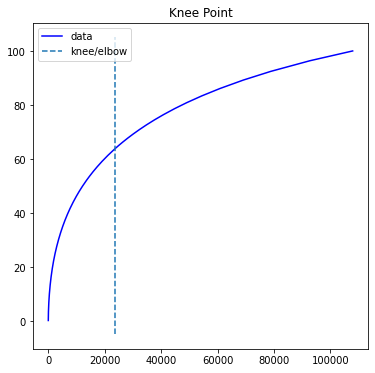

In [35]:
spec_kneedle = KneeLocator(x=df_all_spec_freq.cumul_ratio.index, y=df_all_spec_freq.cumul_ratio, S=1.0, curve="concave", direction="increasing")
spec_kneedle.plot_knee()

In [36]:
print(round(spec_kneedle.knee_y))

64


In [37]:
knee_point_spec = round(spec_kneedle.knee_y)

In [38]:
df_spec_knee = df_all_spec_freq[df_all_spec_freq.cumul_ratio <= knee_point_spec]
df_spec_knee

,word,frequency,ratio,cumul_ratio
0,gedanke,4872,0.233129,0.233129
1,grunde,4541,0.217291,0.450420
2,kindes,2977,0.142452,0.592872
3,gegensatz,2338,0.111875,0.704747
4,opfers,2110,0.100965,0.805712
...,...,...,...,...
23833,buback,19,0.000909,63.996345
23834,dickharn,19,0.000909,63.997254
23835,tigs,19,0.000909,63.998163
23836,höhenflüge,19,0.000909,63.999072


In [39]:
df_spec_knee.to_excel("Special_Name_Exactly_Knee.xlsx", sheet_name="Spec_Name", index=False)

#### First 100 000 Word And Spec Name Analysis

In [40]:
df_word = pd.read_csv(f"/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # Word Merge Result
df_word = df_word.head(100000)
df_word

,word,frequency
0,ich,8138198
1,sie,5307295
2,das,4314201
3,ist,4200394
4,du,4093352
...,...,...
99995,yamasaki,28
99996,michou,28
99997,bevorstehender,28
99998,goldklumpen,28


In [41]:
set_word = set(df_word.iloc[:,0])

In [42]:
set_spec_knee = set(df_spec_knee.iloc[:,0])

In [43]:
df_word_spec = pd.DataFrame(set_word.intersection(set_spec_knee))
df_word_spec.rename(columns={0:"word"}, inplace=True)
df_word_spec

,word
0,lieblingswort
1,manchus
2,byrnes
3,umschweife
4,mündern
...,...
15138,knalltüten
15139,holzzaun
15140,schuldspruch
15141,röstung


In [44]:
df_word_spec.to_excel("Special_Name_In_Adjust_Word.xlsx", sheet_name="Spec_Name", index=False)